# Lab 6
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/syrkis/dlgs/blob/master/labs/lab6.ipynb)

## Example to load the network, sample 4 levels at random from the latent space and then plot them using matplotlib.


In [1]:
# MY CODE ONLY RUNS IN COLAB!
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
#!cp 'path/to/file' 'path/to/drive'

In [3]:
import os
os.chdir("drive/My Drive/exercise_DL_pcg")

In [4]:
!ls

all_levels_onehot.npz		   __pycache__	     train_vae.py
example_sampling_random_levels.py  readme.md	     Untitled.ipynb
models				   requirements.txt  vae_mario.py
plotting_utilities.py		   sprites


In [5]:
import os
import torch
import matplotlib.pyplot as plt

from vae_mario import VAEMario
from plotting_utilities import plot_decoded_level

In [6]:
# Loading the model
model_name = "mario_vae_zdim_2_overfitted"
z_dim = 2
vae = VAEMario(z_dim=z_dim)
vae.load_state_dict(torch.load(f"./models/{model_name}.pt"))


VAEMario(
  (encoder): Sequential(
    (0): Linear(in_features=2156, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (fc_mu): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (fc_var): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2156, bias=True)
  )
)


<All keys matched successfully>

In [7]:
# Sampling random zs
zs = 2.5 * torch.randn((4, z_dim))

In [8]:
# Getting levels from them using the decoder
levels = vae.decode(zs)
# print(levels.shape)
level_imgs = [plot_decoded_level(level) for level in levels]


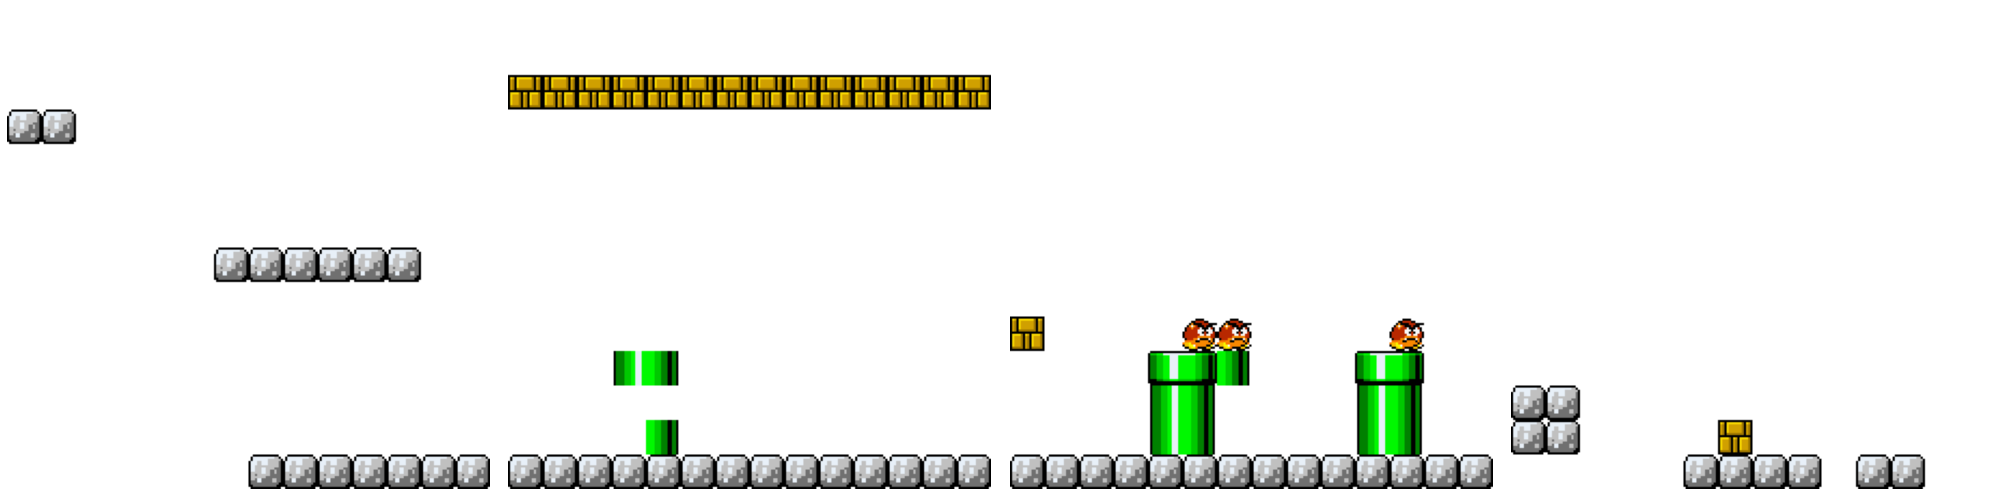

In [10]:
# Plotting
_, axes = plt.subplots(1, 4, figsize=(7 * 4, 7))
for level_img, ax in zip(level_imgs, axes):
    ax.imshow(level_img)
    ax.axis("off")

plt.tight_layout()
plt.show()


# Latent Variable Evolution Lab


## Sample from the VAE and then implement some search algorithm of choice to search the latent space for a particular level (e.g. one with many ground tiles)

In [ ]:
# This runs in collab!
import numpy
import random

levels = vae.decode(zs)

one_level = levels[0]

target = torch.argmax(one_level, dim=0)

best_overall_matrix = torch.randn((4, z_dim))
best_overall_matrix_value = torch.tensor(0)

random_mul = random.randrange(0, 5)
last_random_mul_value = random_mul
random_step_size = (random.randrange(1, 10)) / 100

# For plotting:
plot_values = []

# Maybe change all this...
def evaluation_fn(new_levels):
  best_iteration_matrix = torch.randn((4, z_dim))

  for level in new_levels:
    new_level_argmax = torch.argmax(level, dim=0)
    # Following line gives matrix where 1 is set where they are equal and 0 where they are not
    comparison_matrix = (new_level_argmax == target).int()

    mat1 = torch.sum(comparison_matrix)
    mat2 = torch.sum(best_iteration_matrix)
    if mat1 > mat2:
      best_iteration_matrix = comparison_matrix

  return best_iteration_matrix

def mutation_fn(x):
  zs = x * torch.randn((4, z_dim))
  return zs

while(best_overall_matrix_value < torch.tensor(196)):
  new_levels = mutation_fn(random_mul)
  new_levels_decoded = vae.decode(new_levels)

  iteration_mat = evaluation_fn(new_levels_decoded)

  #print("Iteration nr: " + str(iteration))
  
  mat1 = torch.sum(iteration_mat)
  #print("Current iteration sum:", mat1)
  mat2 = torch.sum(best_overall_matrix)
  #print("Best iteration sum:", mat2)
  if mat1 > mat2:
    best_overall_matrix = iteration_mat
    best_overall_matrix_value = mat1
    random_mul += random_step_size #0.1
  else:
    # The values of -8 and 8 are arbitrary.
    random_mul = random.randrange(-8, 8)
  
  plot_values.append(mat2)

plt.plot(plot_values)

mat2 = torch.sum(best_overall_matrix)
print("Best matrix value:", mat2)
print(best_overall_matrix)